# PIMA Indians Diabetes


## Background

**Diabetes**, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period.  Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger.  If left untreated, diabetes can cause many complications.  Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death.  Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

This **dataset** is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Objective

We will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

## Data


The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

* **Pregnancies**: Number of times pregnant
* **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure**: Diastolic blood pressure (mm Hg)
* **SkinThickness**: Triceps skin fold thickness (mm)
* **Insulin**: 2-Hour serum insulin (mu U/ml)
* **BMI**: Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction**: Diabetes pedigree function
* **Age**: Age (years)
* **Outcome**: Class variable (0 or 1)




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
import plotly.graph_objects as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from IPython.display import HTML, Image

df = pd.read_csv('/content/diabetes.csv')

In [2]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Predictive Modeling

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, classification_report, roc_auc_score, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# Data Pre-processing
-  Glucose/BloodPressure/SkinThickness/Insulin/BMI has 0 values which is not possible. 
- We have to replace 0 values with either mean or median values of specific column

In [7]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].median())

In [8]:
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].median())

In [9]:
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].median())

In [10]:
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())

In [11]:
df['BMI'] = df['BMI'].replace(0,df['BMI'].median())

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


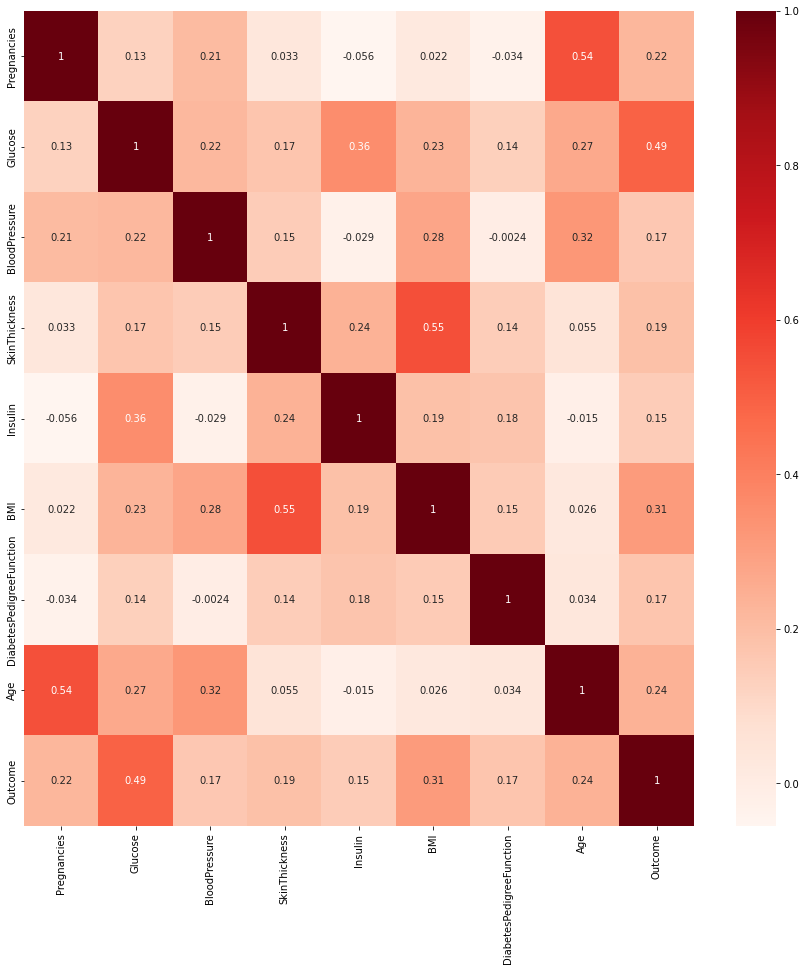

In [13]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True, cmap = 'Reds')

In [14]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]


In [15]:
scaler = StandardScaler()

standardisted = scaler.fit_transform(X)

X  = standardisted

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [17]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

576
576
192
192


Confusion matrix : also known as the error matrix, allows visualization of the performance of an algorithm :

* true positive (TP) : Diabetic correctly identified as diabetic
* true negative (TN) : Healthy correctly identified as healthy
* false positive (FP) : Healthy incorrectly identified as diabetic
* false negative (FN) : Diabetic incorrectly identified as healthy

# Metrics :

* Accuracy : (TP +TN) / (TP + TN + FP +FN)
* Precision : TP / (TP + FP)
* Recall : TP / (TP + FN)
* F1 score : 2 x ((Precision x Recall) / (Precision + Recall))

* Roc Curve : The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

* Precision Recall Curve : shows the tradeoff between precision and recall for different threshold

## Logistic Regression

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is binary.  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [29]:
#Model
LR = LogisticRegression(random_state=42)

#fiting the model
LR.fit(X_train, y_train)

y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

conf_matrix1 = confusion_matrix(y_train, y_train_pred)
conf_matrix2 = confusion_matrix(y_test, y_test_pred)

print(f"TRAIN CONFUSION MATRIX:\n", conf_matrix1)
print(f"TEST CONFUSION MATRIX:\n", conf_matrix2)

#Show metrics
tn = conf_matrix2[0,0]
fp = conf_matrix2[0,1]
fn = conf_matrix2[1,0]
tp = conf_matrix2[1,1]

print("TP: ", tp, "FN: ", fn, "FP: ", fp, "TN: ", tn)

TRAIN CONFUSION MATRIX:
 [[326  44]
 [ 87 119]]
TEST CONFUSION MATRIX:
 [[117  13]
 [ 26  36]]
TP:  36 FN:  26 FP:  13 TN:  117


# [문제 4]
Accuracy, Precision, Recall, F1_score 값을 구하는 수식을 완성하시오.[2점]

In [19]:
Accuracy  =  
Precision =  
Recall    =  
F1_score  =  

print("Accuracy: ", Accuracy)
print("Precision: ", Precision)
print("Recall: ", Recall)
print("F1 Score: ", F1_score)
print("ROC-AUC: ", roc_auc_score(y_test,y_test_pred))

Accuracy:  0.796875
Precision:  0.7346938775510204
Recall:  0.5806451612903226
F1 Score:  0.6486486486486487
ROC-AUC:  0.7403225806451613


# Metrics 평가 함수 정의

In [20]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("\n===============================")
    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [21]:
def roc_auc(model, X_train, X_test, y_train, y_test): 
    y_test_pred = model.predict(X_test)
    print("\n===============================")
    print("ROC_AUC Score : ",roc_auc_score(y_test,y_test_pred))
    fig, axes = plt.subplots(1, 2, figsize=(20,5))
    axes[0].set_title('ROC-AUC from estimator')
    axes[1].set_title('ROC-AUC from predictions')
    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=axes[0])
    RocCurveDisplay.from_predictions(y_test, y_test_pred, ax=axes[1])
    plt.show()


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[326  44]
 [ 87 119]]
ACCURACY SCORE:
0.7726
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.789346    0.730061  0.772569    0.759704      0.768144
recall       0.881081    0.577670  0.772569    0.729375      0.772569
f1-score     0.832695    0.644986  0.772569    0.738841      0.765563
support    370.000000  206.000000  0.772569  576.000000    576.000000

TESTING RESULTS: 
CONFUSION MATRIX:
[[117  13]
 [ 26  36]]
ACCURACY SCORE:
0.7969
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.818182   0.734694  0.796875    0.776438      0.791222
recall       0.900000   0.580645  0.796875    0.740323      0.796875
f1-score     0.857143   0.648649  0.796875    0.752896      0.789817
support    130.000000  62.000000  0.796875  192.000000    192.000000

ROC_AUC Score :  0.7403225806451613


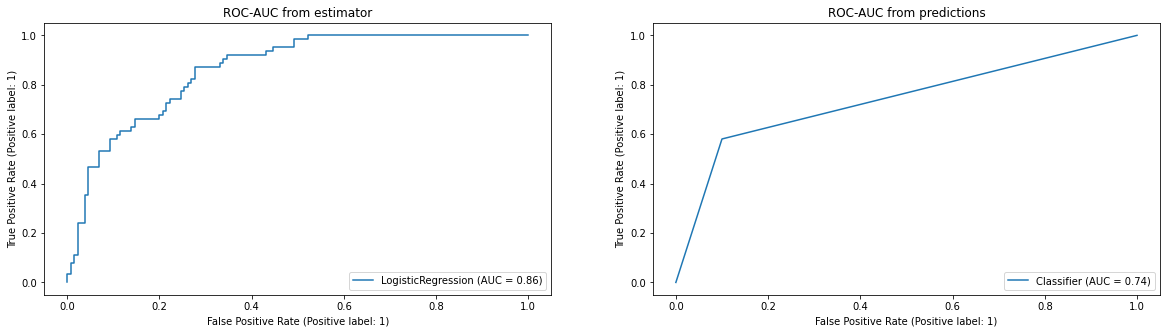

In [22]:
#Model
LR = LogisticRegression(random_state=42)

#fiting the model
LR.fit(X_train, y_train)

evaluate(LR, X_train, X_test, y_train, y_test)

roc_auc(LR, X_train, X_test, y_train, y_test)

## Decision Tree

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. Leaf node (e.g., Hours Played) represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data. 

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[370   0]
 [  0 206]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    370.0  206.0       1.0      576.0         576.0

TESTING RESULTS: 
CONFUSION MATRIX:
[[104  26]
 [ 25  37]]
ACCURACY SCORE:
0.7344
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.806202   0.587302  0.734375    0.696752      0.735515
recall       0.800000   0.596774  0.734375    0.698387      0.734375
f1-score     0.803089   0.592000  0.734375    0.697544      0.734925
support    130.000000  62.000000  0.734375  192.000000    192.000000

ROC_AUC Score :  0.6983870967741935


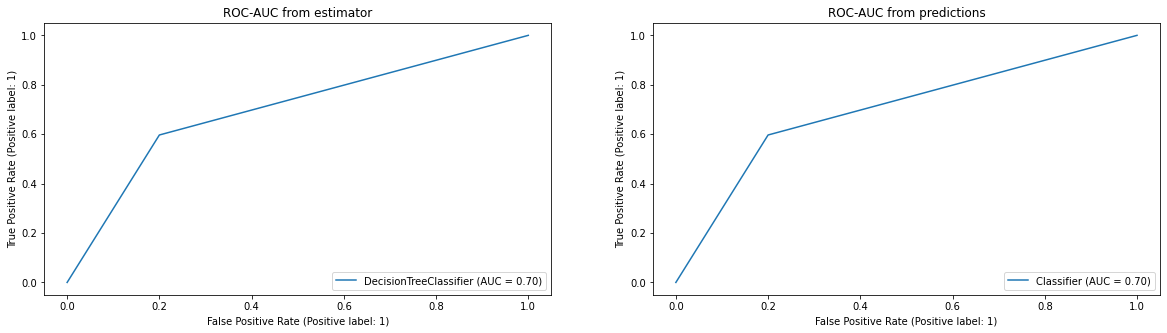

In [23]:
# Decision Tree Model
DT = DecisionTreeClassifier()

#fiting the model
DT.fit(X_train, y_train)

evaluate(DT, X_train, X_test, y_train, y_test)

roc_auc(DT, X_train, X_test, y_train, y_test)

# Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[370   0]
 [  0 206]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    370.0  206.0       1.0      576.0         576.0

TESTING RESULTS: 
CONFUSION MATRIX:
[[113  17]
 [ 24  38]]
ACCURACY SCORE:
0.7865
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.824818   0.690909  0.786458    0.757863      0.781576
recall       0.869231   0.612903  0.786458    0.741067      0.786458
f1-score     0.846442   0.649573  0.786458    0.748007      0.782870
support    130.000000  62.000000  0.786458  192.000000    192.000000

ROC_AUC Score :  0.7410669975186104


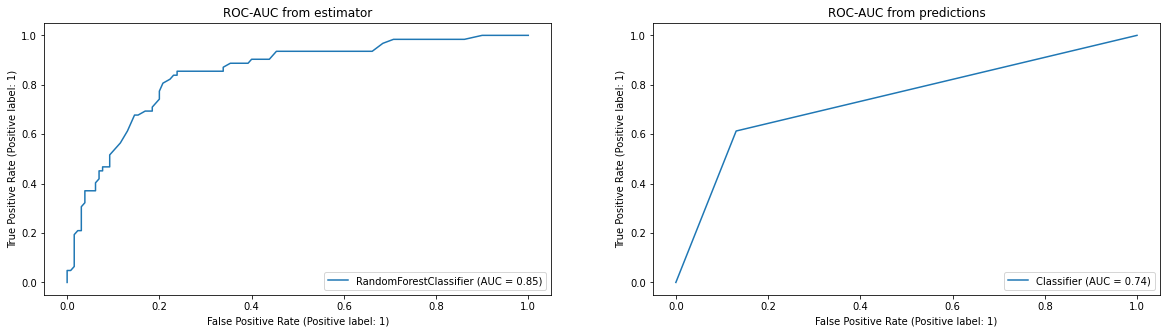

In [24]:
# Random Forest Model
RF = RandomForestClassifier()

#fiting the model
RF.fit(X_train, y_train)

evaluate(RF, X_train, X_test, y_train, y_test)

roc_auc(RF, X_train, X_test, y_train, y_test)

## Gradient Boosting




Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[361   9]
 [ 32 174]]
ACCURACY SCORE:
0.9288
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.918575    0.950820  0.928819    0.934697      0.930107
recall       0.975676    0.844660  0.928819    0.910168      0.928819
f1-score     0.946265    0.894602  0.928819    0.920433      0.927788
support    370.000000  206.000000  0.928819  576.000000    576.000000

TESTING RESULTS: 
CONFUSION MATRIX:
[[111  19]
 [ 24  38]]
ACCURACY SCORE:
0.7760
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.822222   0.666667  0.776042    0.744444      0.771991
recall       0.853846   0.612903  0.776042    0.733375      0.776042
f1-score     0.837736   0.638655  0.776042    0.738196      0.773449
support    130.000000  62.000000  0.776042  192.000000    192.000000

ROC_AUC Score :  0.7333746898263026


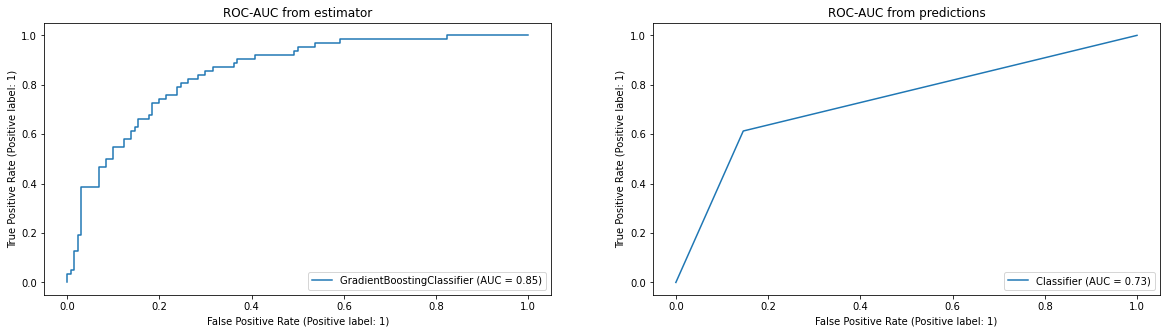

In [30]:
#Model
GBC = GradientBoostingClassifier(random_state=42)

#fiting the model
GBC.fit(X_train, y_train)

evaluate(GBC, X_train, X_test, y_train, y_test)

roc_auc(GBC, X_train, X_test, y_train, y_test)

# [문제 5]

AdaBoosting Model을 생성하고 혼동행렬과 성능평가 지표들을 구하는 프로그램을 완성하시오.[1점]

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[320  50]
 [ 63 143]]
ACCURACY SCORE:
0.8038
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.835509    0.740933  0.803819    0.788221      0.801685
recall       0.864865    0.694175  0.803819    0.779520      0.803819
f1-score     0.849934    0.716792  0.803819    0.783363      0.802317
support    370.000000  206.000000  0.803819  576.000000    576.000000

TESTING RESULTS: 
CONFUSION MATRIX:
[[109  21]
 [ 25  37]]
ACCURACY SCORE:
0.7604
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.813433   0.637931  0.760417    0.725682      0.756760
recall       0.838462   0.596774  0.760417    0.717618      0.760417
f1-score     0.825758   0.616667  0.760417    0.721212      0.758239
support    130.000000  62.000000  0.760417  192.000000    192.000000

ROC_AUC Score :  0.7176178660049628


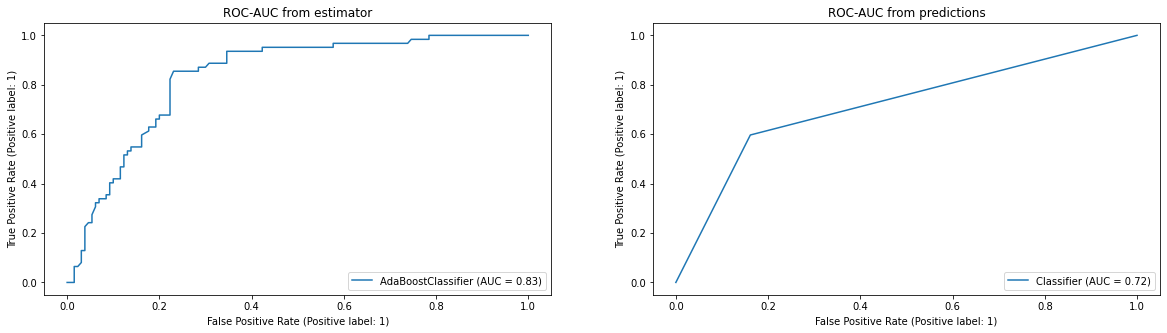

In [31]:
# AdaBoosting Model

# Voting model

In [35]:
estimators = []
log_reg = LogisticRegression(solver='liblinear', random_state=42)
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier(random_state=42)
estimators.append(('Tree', tree))

svm_clf = SVC(random_state=42)
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[347  23]
 [ 66 140]]
ACCURACY SCORE:
0.8455
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.840194    0.858896  0.845486    0.849545      0.846882
recall       0.937838    0.679612  0.845486    0.808725      0.845486
f1-score     0.886335    0.758808  0.845486    0.822571      0.840726
support    370.000000  206.000000  0.845486  576.000000    576.000000

TESTING RESULTS: 
CONFUSION MATRIX:
[[118  12]
 [ 26  36]]
ACCURACY SCORE:
0.8021
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.819444   0.750000  0.802083    0.784722      0.797020
recall       0.907692   0.580645  0.802083    0.744169      0.802083
f1-score     0.861314   0.654545  0.802083    0.757930      0.794545
support    130.000000  62.000000  0.802083  192.000000    192.000000


# [문제 6]

Bagging Model을 생성하고 혼동행렬과 성능평가 지표들을 구하는 프로그램을 완성하시오.[1점]

# Bagging Model

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[370   0]
 [  0 206]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    370.0  206.0       1.0      576.0         576.0

TESTING RESULTS: 
CONFUSION MATRIX:
[[114  16]
 [ 23  39]]
ACCURACY SCORE:
0.7969
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.832117   0.709091  0.796875    0.770604      0.792390
recall       0.876923   0.629032  0.796875    0.752978      0.796875
f1-score     0.853933   0.666667  0.796875    0.760300      0.793461
support    130.000000  62.000000  0.796875  192.000000    192.000000

ROC_AUC Score :  0.7529776674937965


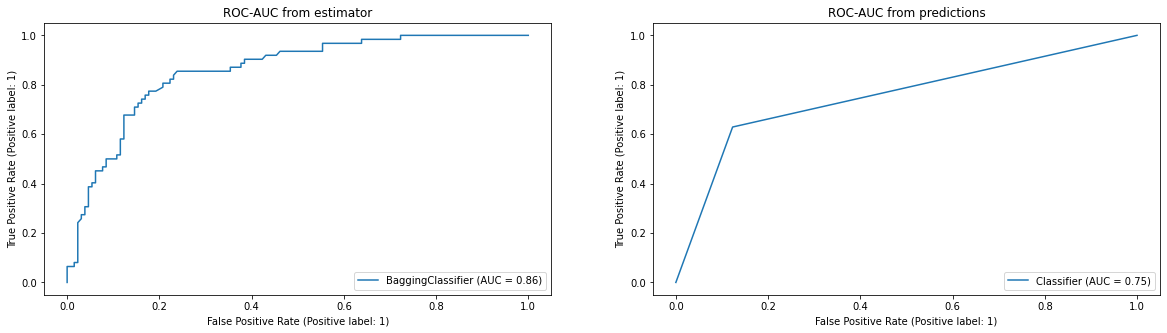

In [36]:
# Bagging Model